In [14]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#variable="air.2m.intersections"
#variable="air.sfc.intersections"
#variable="apcp.intersections"
variable="rhum.2m.intersections"

In [17]:
months=["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
years=range(1999, 2016)

In [18]:
df= pd.read_csv("/Users/sparshagarwal/Downloads/WMV_data/Arbovirus_risk_modeling_US/WNV_human_cases/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530.csv", encoding='latin-1')
df=df[df["Select_County"]==1]
df.rename(columns = {'GEOID10':'GEOID'}, inplace = True)

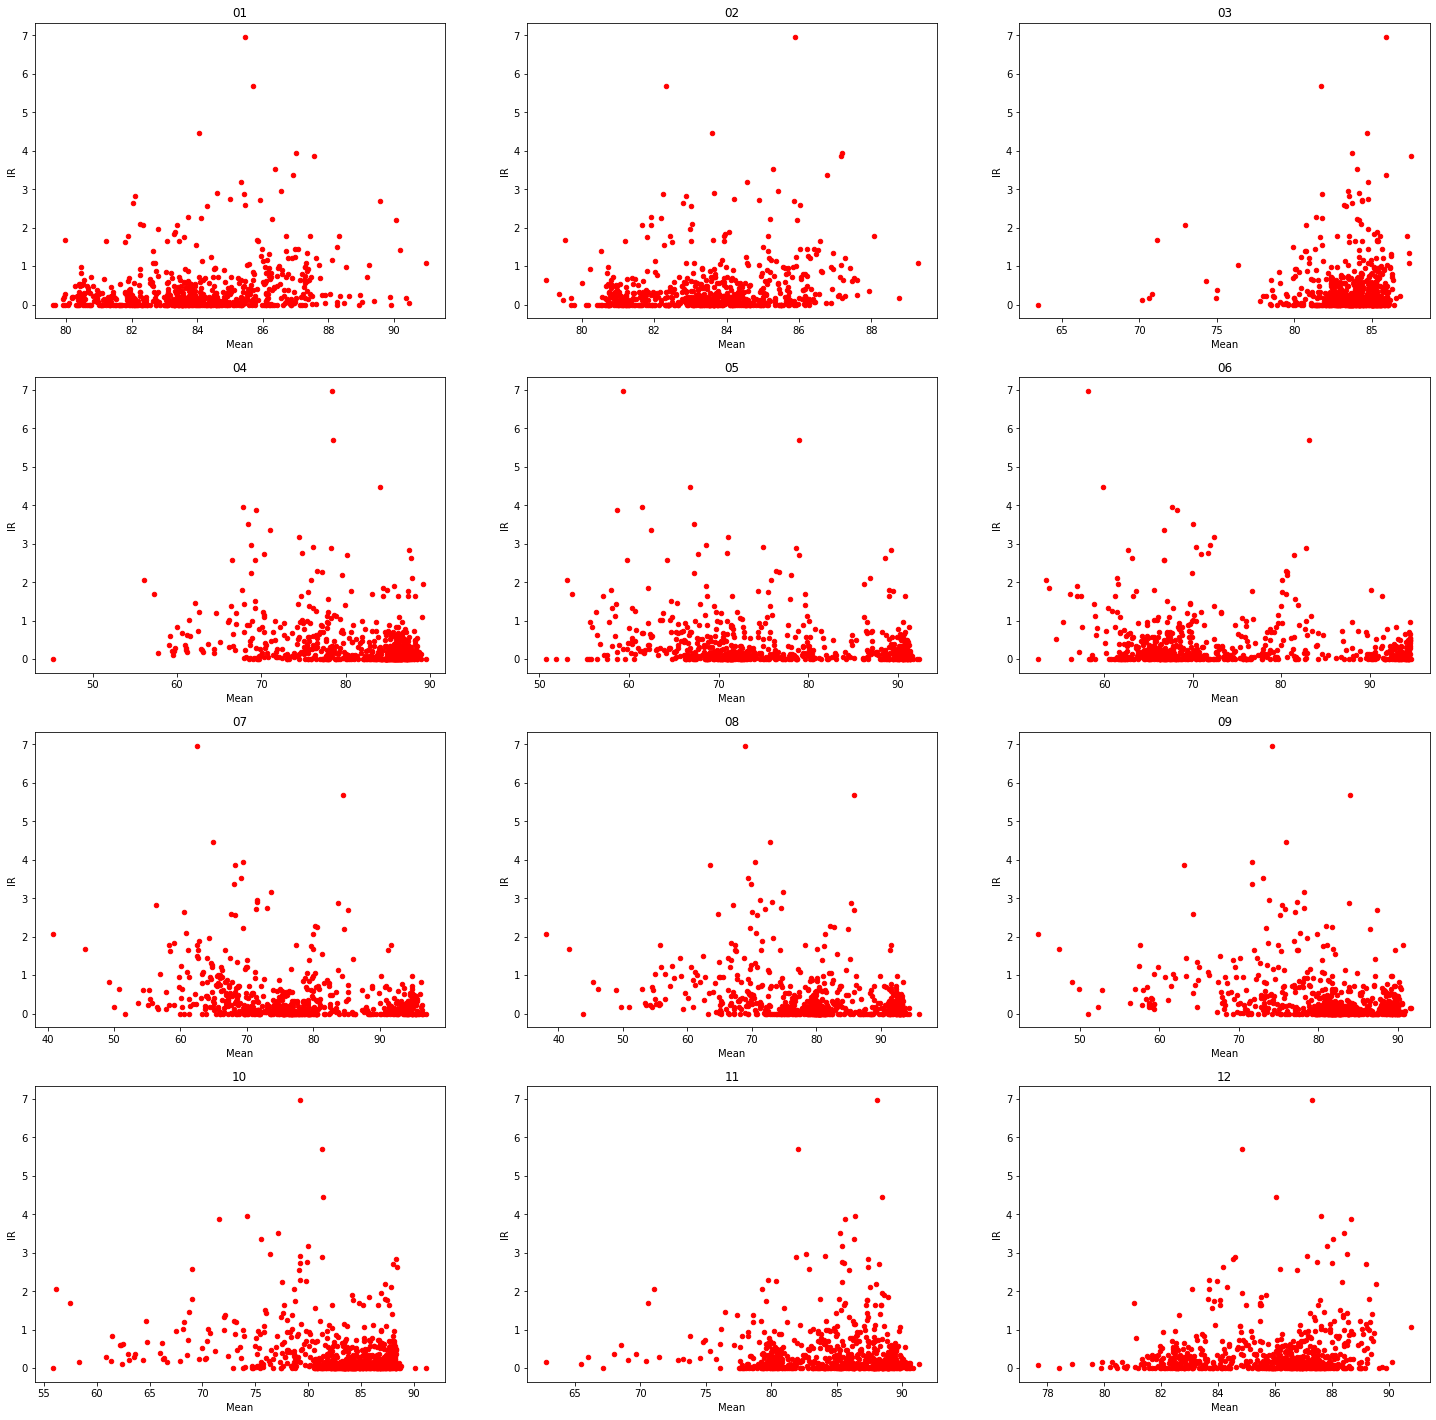

In [19]:
for k in range(len(months)):
    df_mod=df.copy()
    for j in years:
        temp= pd.read_csv("/Users/sparshagarwal/Downloads/WMV_data/intersections/" + variable +"/"+ str(j) + "_" + months[k] + ".csv")
        temp=temp[["GEOID", "mean"]]
        temp.rename(columns = {'mean':'mean_' + str(j)}, inplace = True)
        df_mod=df_mod.join(temp.set_index('GEOID'), on='GEOID')
            
    x=[]
    y=[]
    for j in range(len(df_mod)):
        a=[]
        b=[]
        for i in years:  
            if(df_mod.iloc[j]["NI_IR_" + str(i)]!=0):
                for l in range(i+1, 2016):
                    a.append(df_mod.iloc[j]["NI_IR_" + str(l)])
                    b.append(df_mod.iloc[j]["mean_" + str(l)])
                if(i!=2015):
                    x.append(sum(b)/len(b))
                    y.append(sum(a)/len(a))
                break
        
    df_combined=pd.DataFrame()
    df_combined["Mean"]=x
    df_combined["IR"]=y
    ax=plt.subplot(4,3,k+1)
    ax.set_title(str(months[k]))
    df_combined.plot(kind='scatter',x='Mean',y='IR',color='red', ax=ax, figsize=(25,25)) 